In [1]:
pip install pandas numpy scikit-learn tensorflow yfinance


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load data from the CSV file
data = pd.read_csv('AAPL.csv')

# Ensure the date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date
data = data.sort_values('Date')

# Handle missing values (if any)
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Define the look-back window for time series data
look_back = 30  # You can adjust this as needed

# Create sequences of data for training
X, y = [], []
for i in range(len(data) - look_back):
    X.append(data[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[i:i+look_back].values)
    y.append(data['Close'].iloc[i+look_back])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Epoch 1/10
3/3 [==============================] - 4s 24ms/step - loss: 0.1406
Epoch 2/10
3/3 [==============================] - 0s 26ms/step - loss: 0.0246
Epoch 3/10
3/3 [==============================] - 0s 21ms/step - loss: 0.0150
Epoch 4/10
3/3 [==============================] - 0s 35ms/step - loss: 0.0288
Epoch 5/10
3/3 [==============================] - 0s 30ms/step - loss: 0.0148
Epoch 6/10
3/3 [==============================] - 0s 31ms/step - loss: 0.0055
Epoch 7/10
3/3 [==============================] - 0s 36ms/step - loss: 0.0067
Epoch 8/10
3/3 [==============================] - 0s 32ms/step - loss: 0.0092
Epoch 9/10
3/3 [==============================] - 0s 31ms/step - loss: 0.0081
Epoch 10/10
2/2 [==============================] - 1s 8ms/step
Mean Squared Error: 0.00402761231147459


Epoch 1/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0041
Epoch 2/10
3/3 [==============================] - 0s 23ms/step - loss: 0.0044
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 0.0049
Epoch 4/10
3/3 [==============================] - 0s 22ms/step - loss: 0.0044
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 0.0037
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0036
Epoch 7/10
3/3 [==============================] - 0s 26ms/step - loss: 0.0038
Epoch 8/10
3/3 [==============================] - 0s 24ms/step - loss: 0.0037
Epoch 9/10
3/3 [==============================] - 0s 34ms/step - loss: 0.0035
Epoch 10/10
2/2 [==============================] - 0s 10ms/step
Mean Squared Error: 0.0032578888824699825


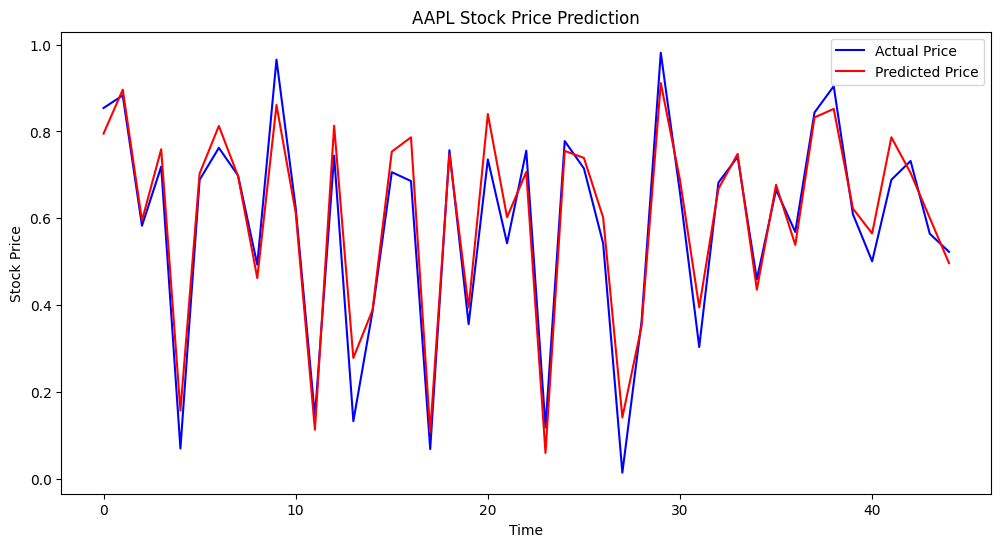

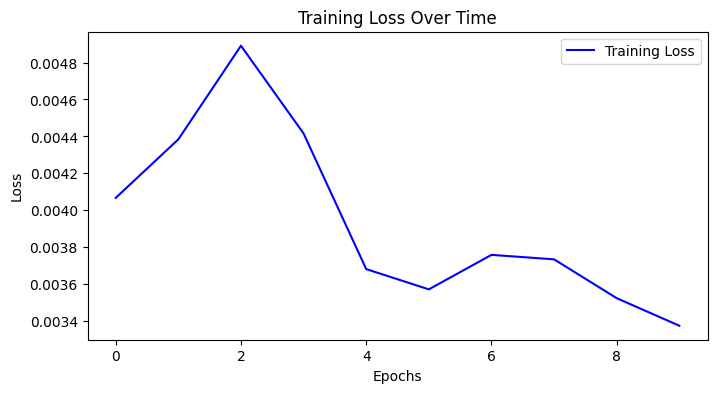

In [3]:
import matplotlib.pyplot as plt

# Train the model and capture training history
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the training loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
